<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:** Predicting whether a student will pass (1) or fail (0) based on study hours and number of previous passes. Sample dataset with two predictor variables: Study Hours, Previous Passes.

Dataset = https://github.com/amrahmani/ML/blob/main/student_data.csv

Objective: Fit an **SVM** to the data to predict the probability of passing for a new student.

Accuracy: 1.00
R^2: 0.87
Adjusted R^2: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



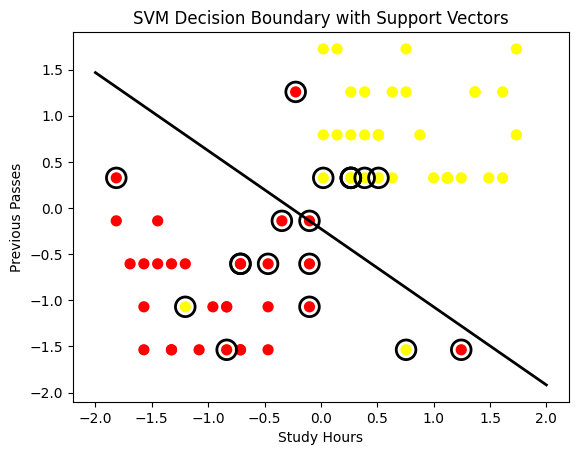

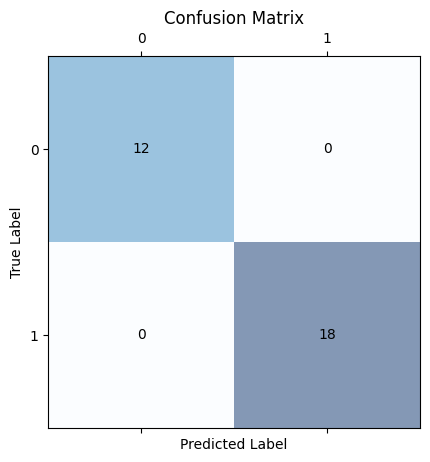

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/student_data.csv'
df = pd.read_csv(url)

# Define the features and target
X = df[['Study Hours', 'Previous Passes']]
y = df['Pass/Fail']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier with a linear kernel
clf = SVC(kernel='linear', probability=True, C=1)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_prob)

# Calculate adjusted R^2 (for completeness; it’s not typical for classification)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Adjusted R^2: {adjusted_r2:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.plot(xx, yy, 'k-', lw=2)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200,
            facecolors='none', edgecolors='k', linewidths=2)
plt.xlabel('Study Hours')
plt.ylabel('Previous Passes')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Task 2**

In [ ]:
from sklearn.inspection import permutation_importance

# permutation_importance: calculates the importance of each feature in a model by randomly permuting the values of that feature and observing how the model's performance changes.
# Perform permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)

# Print feature importances
feature_importances = result.importances_mean
feature_names = X.columns
for i, importance in enumerate(feature_importances):
    print(f"{feature_names[i]}: {importance:.2f}")

Assignments Completed: 0.00
Attendance Rate: 0.04
Previous GPA: 0.00
Study Hours: 0.16
Previous Passes: 0.15


**Problem 2:** Predicting whether a student will pass (1) or fail (0) based on study hours and number of previous passes. Sample dataset with two predictor variables: Study Hours, Previous Passes.

Dataset = https://github.com/amrahmani/ML/blob/main/student_data.csv

Objective: Fit **SVMs with different kernels** to the data to predict the probability of passing for a new student.

Kernel: linear
Accuracy: 1.0000
R²: 0.9086
Adjusted R²: 0.9019
Confusion Matrix:
[[12  0]
 [ 0 18]]



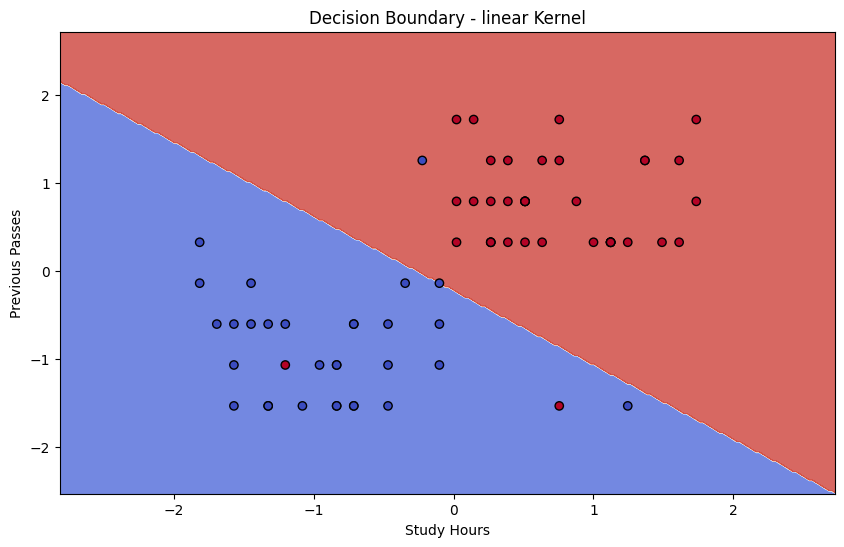

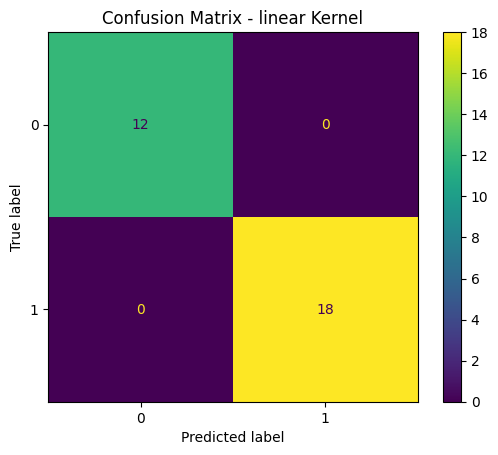

Kernel: poly
Accuracy: 0.8667
R²: 0.7112
Adjusted R²: 0.6898
Confusion Matrix:
[[ 8  4]
 [ 0 18]]



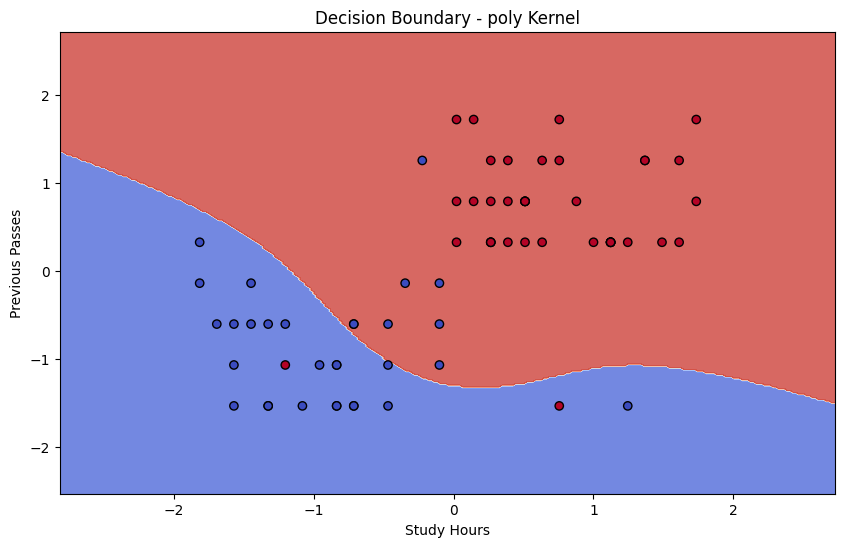

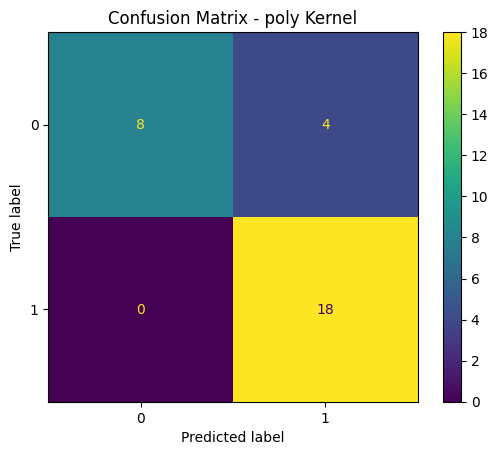

Kernel: rbf
Accuracy: 1.0000
R²: 0.9466
Adjusted R²: 0.9426
Confusion Matrix:
[[12  0]
 [ 0 18]]



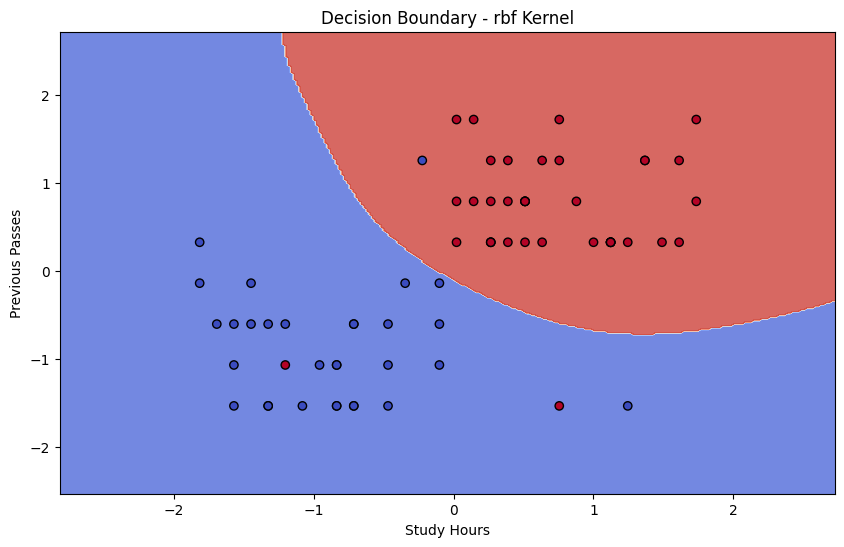

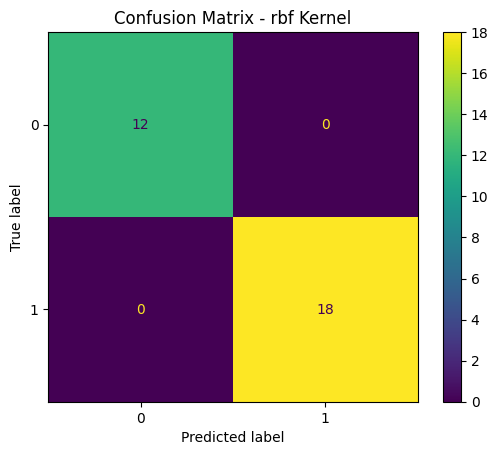

Kernel: sigmoid
Accuracy: 1.0000
R²: 0.9106
Adjusted R²: 0.9039
Confusion Matrix:
[[12  0]
 [ 0 18]]



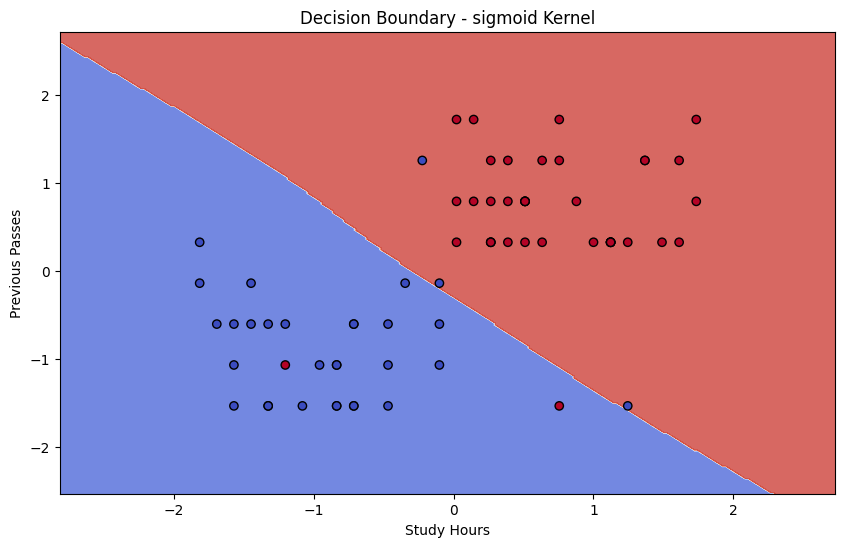

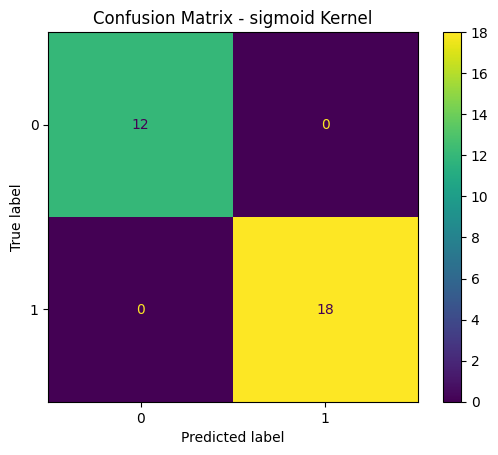

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/student_data.csv'
df = pd.read_csv(url)

# Define X and y
X = df[['Study Hours', 'Previous Passes']]
y = df['Pass/Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to fit SVM and plot decision boundary and metrics
def plot_svm(kernel_name, X_train, X_test, y_train, y_test):
    # Train the SVM model
    model = SVC(kernel=kernel_name, probability=True)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_prob)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display metrics
    print(f'Kernel: {kernel_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Adjusted R²: {adj_r2:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print()

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))

    # Create a grid to plot decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(f'Decision Boundary - {kernel_name} Kernel')
    plt.xlabel('Study Hours')
    plt.ylabel('Previous Passes')
    plt.show()

    # Plot the confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
    plt.title(f'Confusion Matrix - {kernel_name} Kernel')
    plt.show()

# Kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Fit and visualize SVMs for each kernel
for kernel in kernels:
    plot_svm(kernel, X_train, X_test, y_train, y_test)

**Problem 3:** Fit SVM models with linear and RBF kernels to this
Dataset: https://github.com/amrahmani/ML/blob/main/mobile_data.csv

visualize decision boundaries, hyperplanes, and compare results using accuracy, R², adjusted R², and confusion matrices. The dataset has multiple features, and the task is to predict the price_range which has four classes.

Kernel: linear
Accuracy: 0.9517
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       151
           1       0.92      0.98      0.95       146
           2       0.94      0.92      0.93       148
           3       0.96      0.95      0.95       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:
[[145   6   0   0]
 [  2 143   1   0]
 [  0   6 136   6]
 [  0   0   8 147]]



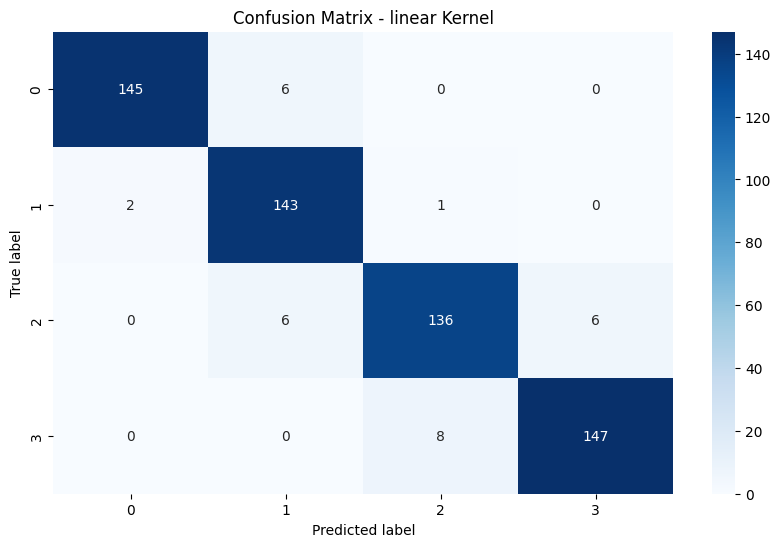

Kernel: rbf
Accuracy: 0.8883
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       151
           1       0.85      0.88      0.87       146
           2       0.84      0.84      0.84       148
           3       0.93      0.90      0.91       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Confusion Matrix:
[[140  11   0   0]
 [  9 129   8   0]
 [  0  12 125  11]
 [  0   0  16 139]]



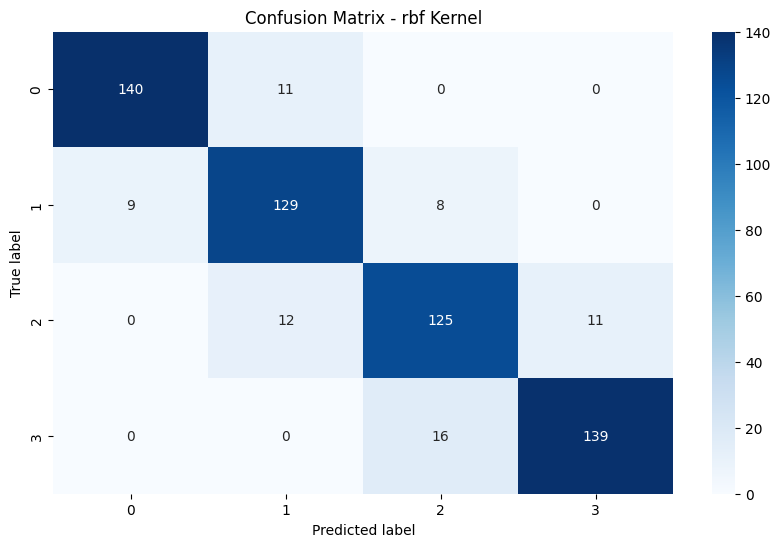

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/mobile_data.csv'
df = pd.read_csv(url)

# Define features and target
X = df[['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'n_cores', 'px_height', 'px_width', 'ram', 'touch_screen', 'wifi']]
y = df['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the function to train SVM and plot results
def plot_svm(kernel_name, X_train, X_test, y_train, y_test):
    # Train the SVM model
    model = SVC(kernel=kernel_name, decision_function_shape='ovr', probability=True)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Display metrics
    print(f'Kernel: {kernel_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(class_report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(4), yticklabels=np.arange(4))
    plt.title(f'Confusion Matrix - {kernel_name} Kernel')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Kernels to evaluate
kernels = ['linear', 'rbf']

# Fit and visualize SVMs for each kernel
for kernel in kernels:
    plot_svm(kernel, X_train, X_test, y_train, y_test)


**Task 5**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Define features and target
X = df[['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'n_cores', 'px_height', 'px_width', 'ram', 'touch_screen', 'wifi']]
y = df['price_range']

# Feature selection using chi-squared test
selector = SelectKBest(chi2, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
X = X.columns[selector.get_support()]


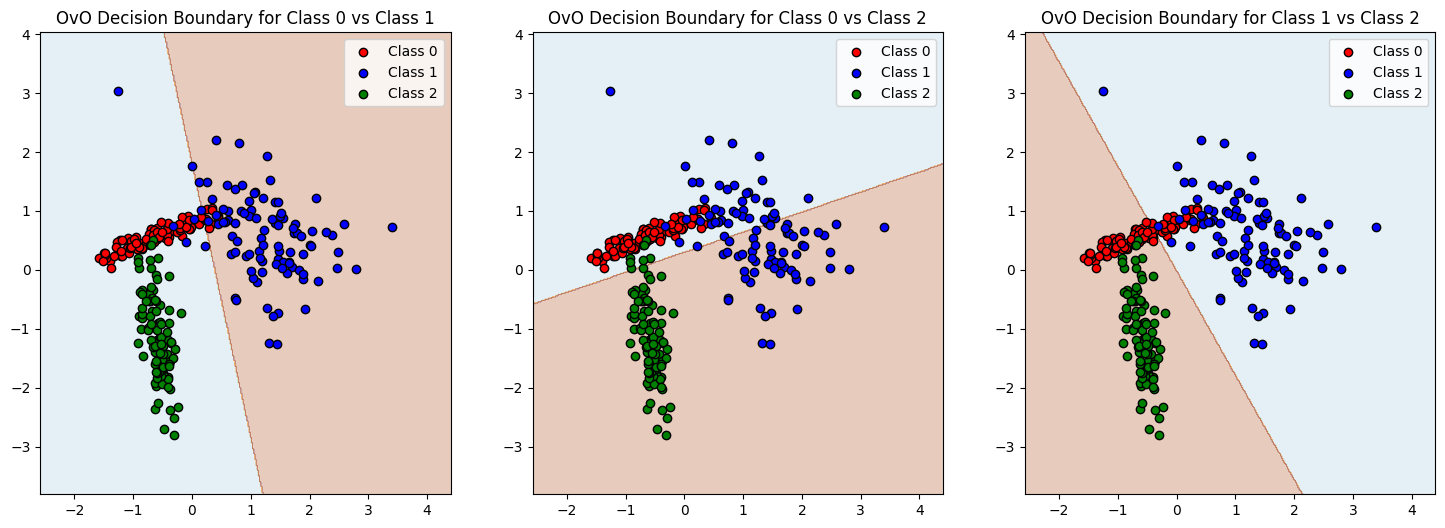

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Create a synthetic dataset with 3 classes
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Fit a SVM Classifier using One-vs-One (OvO) strategy
ovo_clf = OneVsOneClassifier(SVC(kernel='linear')).fit(X, y)

# Step 3: Visualize the decision boundaries for each pair of classes
def plot_ovo_decision_boundary(classifier, X, y, pair, ax):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict class for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Plot the training points
    for idx, color in enumerate(['red', 'blue', 'green']):
        ax.scatter(X[y == idx, 0], X[y == idx, 1], c=color, label=f'Class {idx}', edgecolor='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #The following line was updated to remove the invalid indices
    ax.set_title(f'OvO Decision Boundary for Class {pair[0]} vs Class {pair[1]}')
    ax.legend()

# Create subplots for each OvO classifier
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Get the OvO classifiers (pairwise classifiers)
ovo_pairs = ovo_clf.estimators_
#ovo_clf.classes_ returns a 1d array containing the classes.
# To get the pairs, we need to use combinations from itertools
from itertools import combinations
pairs = list(combinations(ovo_clf.classes_,2))

# Plot decision boundaries for each pair
for i, ax in enumerate(axs):
    plot_ovo_decision_boundary(ovo_pairs[i], X, y, pair=pairs[i], ax=ax)

plt.show()

**Problem 4:** Fit the following models: Support Vector Regression (SVR) models with different kernels (linear, poly, rbf, sigmoid) on the given dataset with the feature {age} to predict {wage}.

Dataset=https://github.com/amrahmani/ML/blob/main/wage_data.csv

First, visualize the feature with scatter plots, and then compare the models using regression metrics.

<ipython-input-22-e27e76fd6151>:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


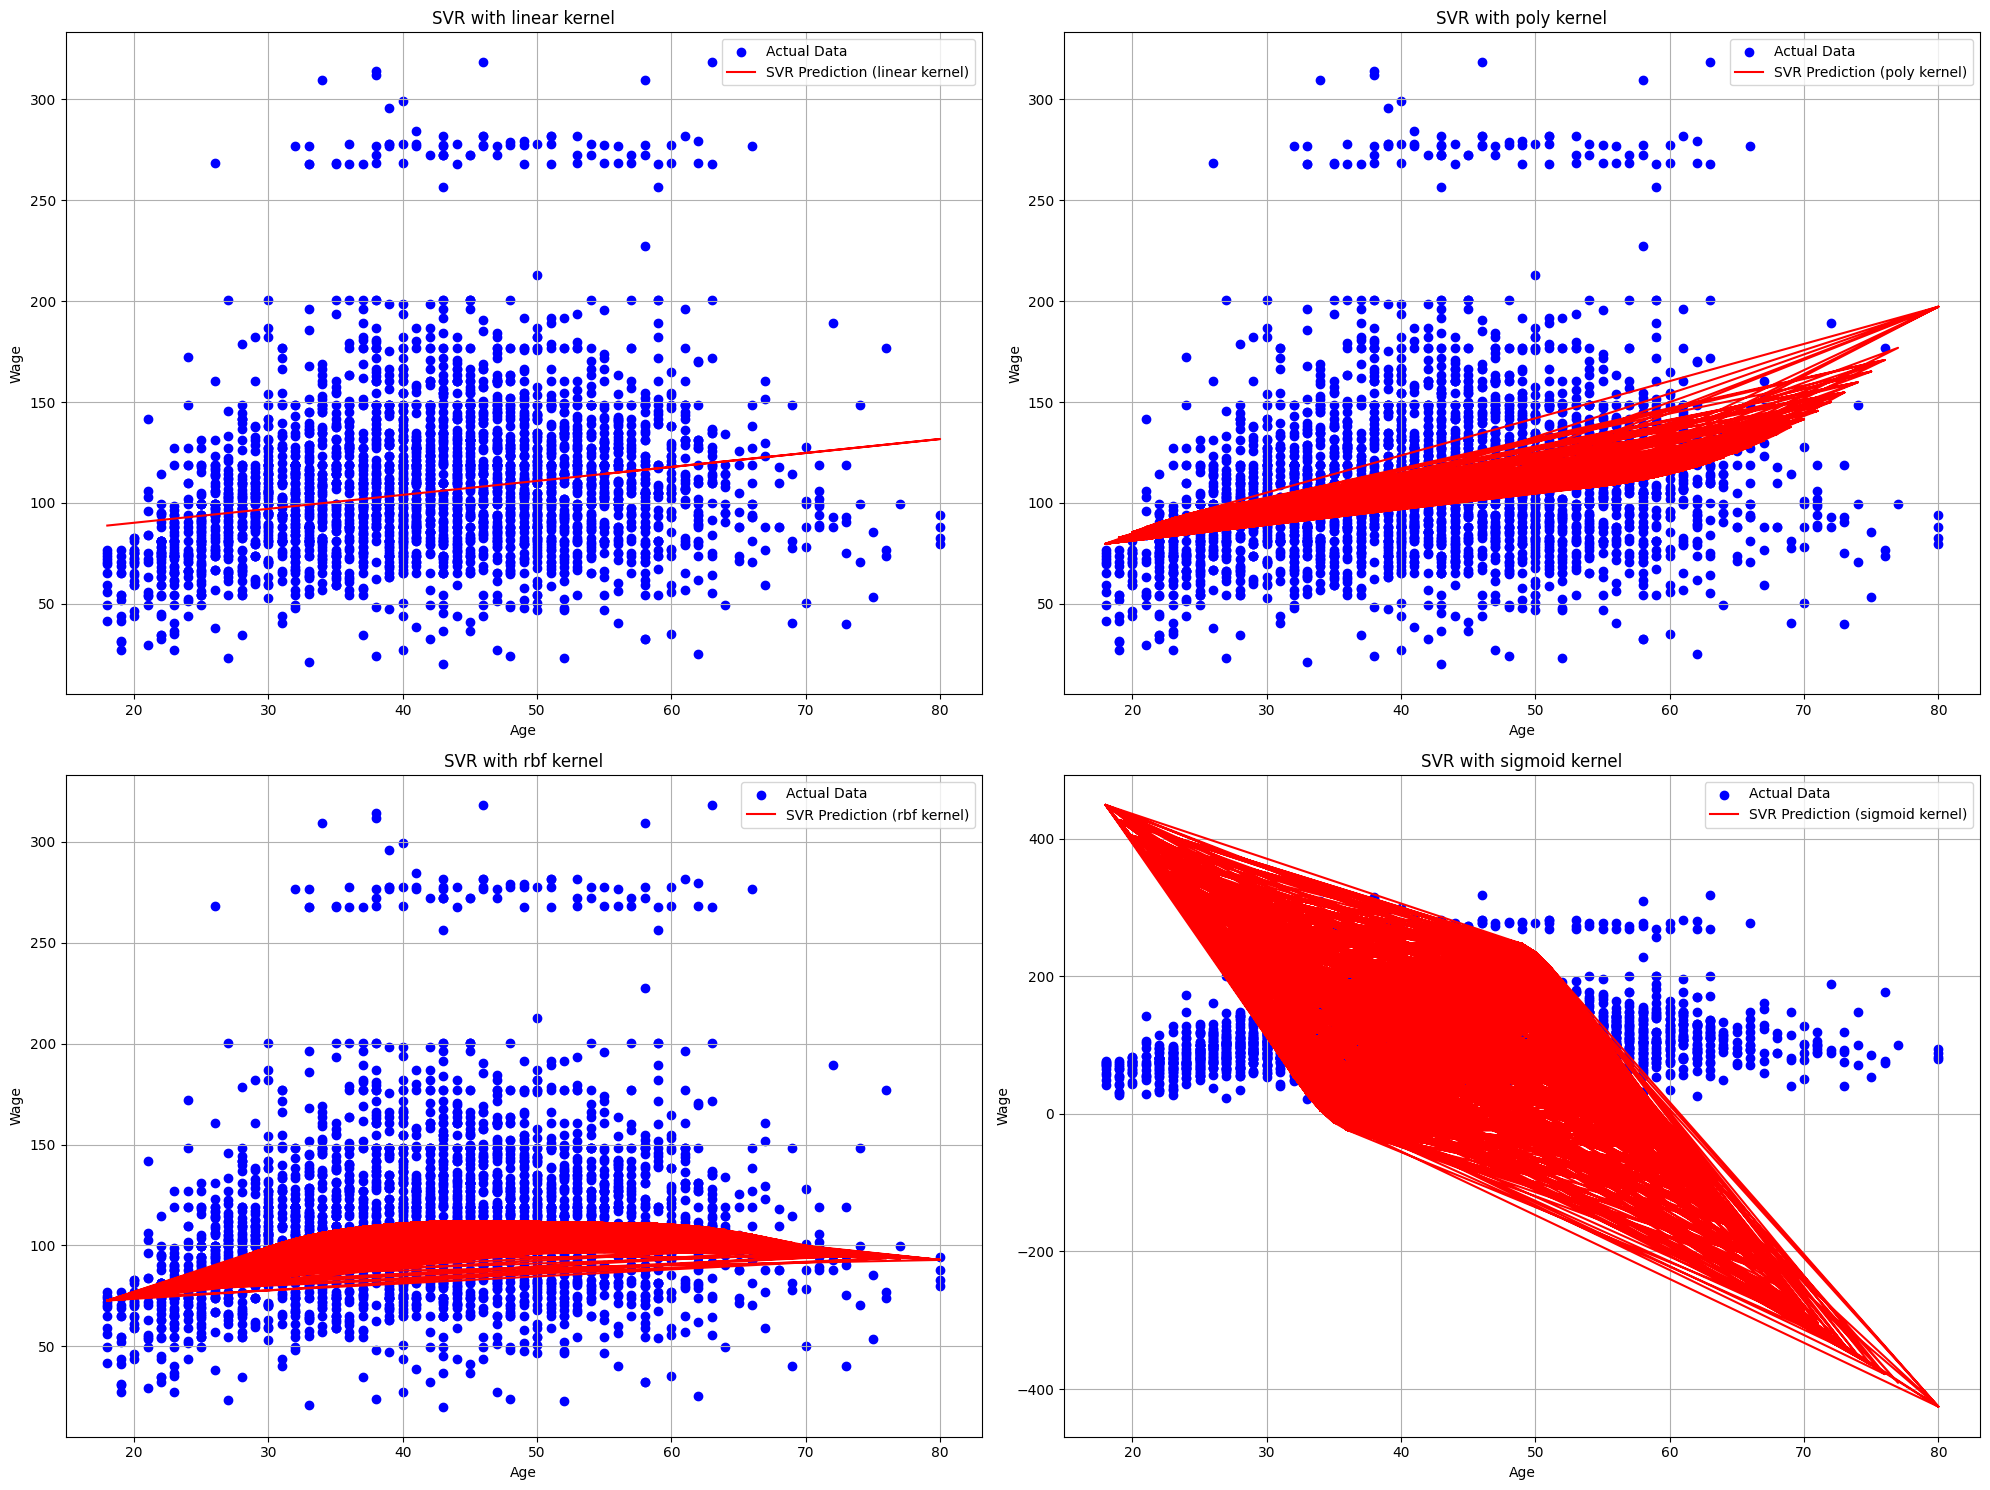

Kernel	MSE		MAE		R^2
linear	1710.52		28.32		0.02
poly	1761.84		28.63		-0.01
rbf	1631.10		27.30		0.06
sigmoid	20662.74		115.48		-10.87


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/wage_data.csv'
df = pd.read_csv(url)

# Step 2: Extract the features and target variable
X = df['age'].values.reshape(-1, 1)
y = df['wage'].values

# Step 3: Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Define and fit the SVR models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Step 5: Fit the models and store the results
results = {}
for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_scaled, y)
    y_pred = svr.predict(X_scaled)

    # Calculate regression metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store results in a dictionary
    results[kernel] = {'model': svr, 'y_pred': y_pred, 'MSE': mse, 'MAE': mae, 'R2': r2}

# Step 6: Visualization of the results
plt.figure(figsize=(20, 15))
plt.scatter(X, y, color='blue', label='Actual Data')

for i, kernel in enumerate(kernels):
    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, results[kernel]['y_pred'], color='red', label=f'SVR Prediction ({kernel} kernel)')
    plt.title(f'SVR with {kernel} kernel')
    plt.xlabel('Age')
    plt.ylabel('Wage')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Step 7: Display regression metrics
print("Kernel\tMSE\t\tMAE\t\tR^2")
for kernel in kernels:
    print(f"{kernel}\t{results[kernel]['MSE']:.2f}\t\t{results[kernel]['MAE']:.2f}\t\t{results[kernel]['R2']:.2f}")


**Problem 5:** Fit the following models: Support Vector Regression (SVR) models with different kernels (linear, polynomial, RBF, sigmoid) on the given dataset with the features {age, education} to predict {wage}.

Dataset = https://github.com/amrahmani/ML/blob/main/wage_data.csv

First, visualize the feature with scatter plots, and then compare the models using regression metrics.

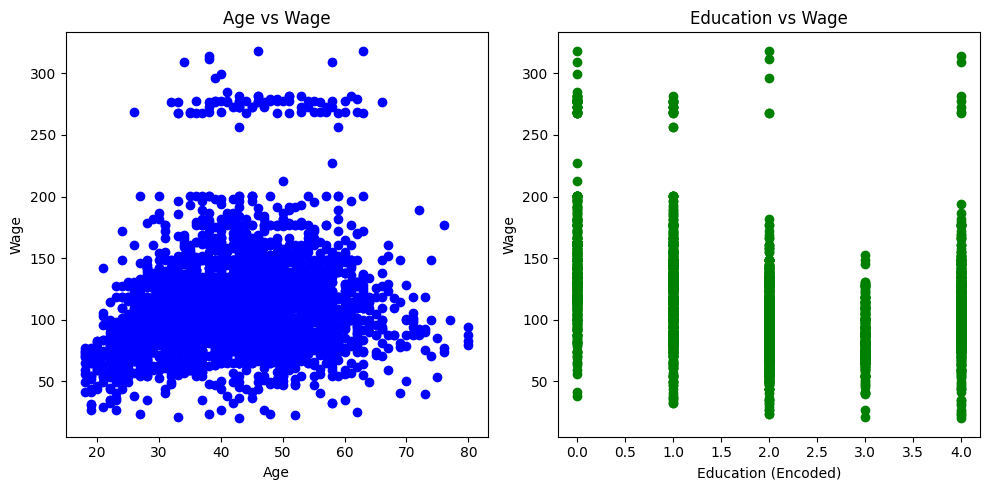

Kernel: linear
Mean Squared Error: 1398.07
R^2 Score: 0.10
------------------------------


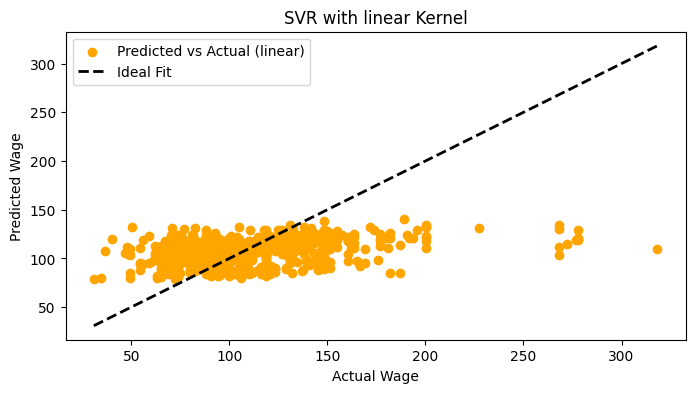

Kernel: poly
Mean Squared Error: 1443.96
R^2 Score: 0.07
------------------------------


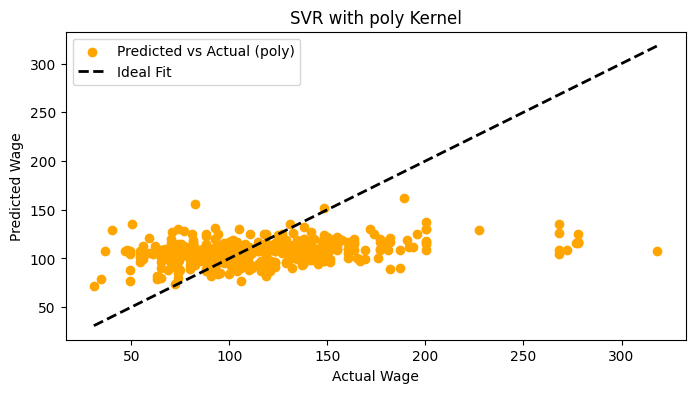

Kernel: rbf
Mean Squared Error: 1154.12
R^2 Score: 0.26
------------------------------


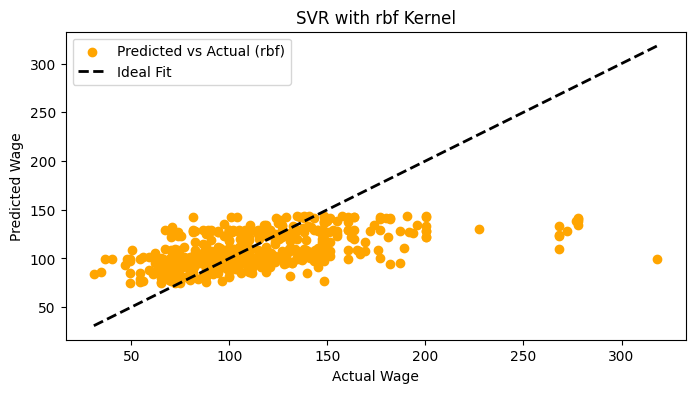

Kernel: sigmoid
Mean Squared Error: 7495.55
R^2 Score: -3.81
------------------------------


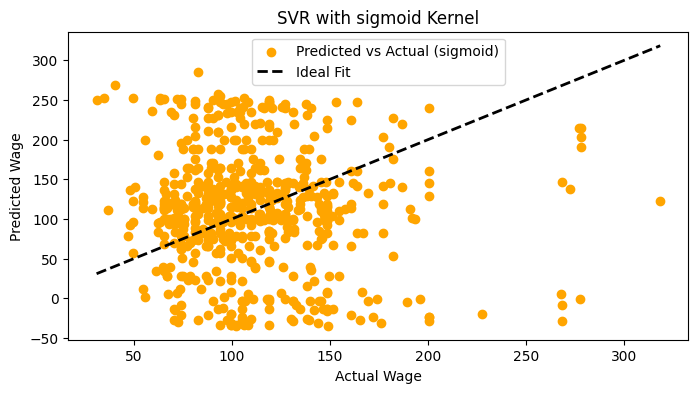

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/wage_data.csv'
df = pd.read_csv(url)

# Step 2: Delete missing values
df = df.dropna()

# Step 3: Encode the categorical variable 'education'
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['education'])

# Define features and target
X = df[['age', 'education_encoded']]
y = df['wage']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit SVR models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    models[kernel] = svr

# Step 7: Visualize the features with scatter plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['age'], df['wage'], color='blue', label='Age vs Wage')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Age vs Wage')

plt.subplot(1, 2, 2)
plt.scatter(df['education_encoded'], df['wage'], color='green', label='Education vs Wage')
plt.xlabel('Education (Encoded)')
plt.ylabel('Wage')
plt.title('Education vs Wage')

plt.tight_layout()
plt.show()

# Step 8: Compare models using regression metrics
for kernel, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Kernel: {kernel}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)

    # Visualize the predictions
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_pred, color='orange', label=f'Predicted vs Actual ({kernel})')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual Wage')
    plt.ylabel('Predicted Wage')
    plt.title(f'SVR with {kernel} Kernel')
    plt.legend()
    plt.show()


SVM model

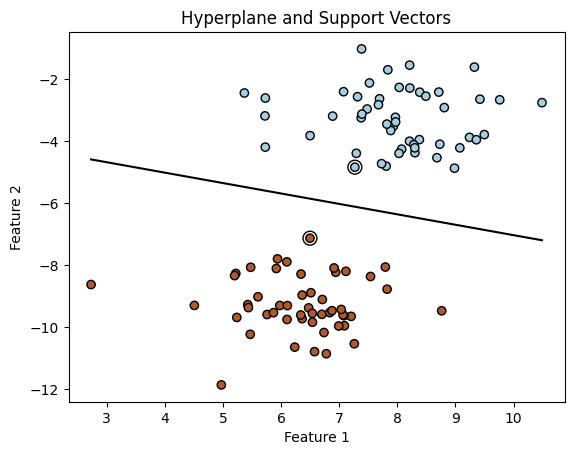

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Create a dataset with two classes
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Fit the SVM model with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the points and the separating hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.plot(xx, yy, 'k-')

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hyperplane and Support Vectors')
plt.show()


One-vs-One (OvO) Strategy with 3 Classes

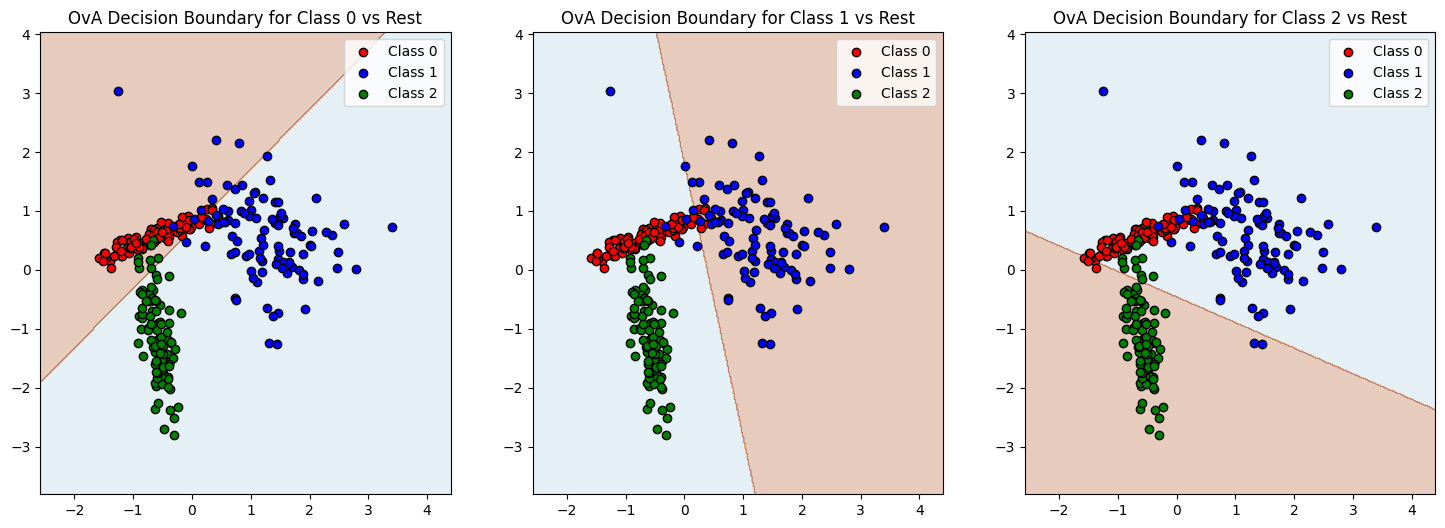

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Create a synthetic dataset with 3 classes
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Fit a SVM Classifier using One-vs-All (OvA) strategy
ova_clf = OneVsRestClassifier(SVC(kernel='linear')).fit(X, y)

# Step 3: Visualize the decision boundaries for each class against the others
def plot_ova_decision_boundary(classifier, X, y, class_label, ax):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict class for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Plot the training points
    for idx, color in enumerate(['red', 'blue', 'green']):
        ax.scatter(X[y == idx, 0], X[y == idx, 1], c=color, label=f'Class {idx}', edgecolor='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f'OvA Decision Boundary for Class {class_label} vs Rest')
    ax.legend()

# Create subplots for each OvA classifier
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot decision boundaries for each class against the others
for i, ax in enumerate(axs):
    plot_ova_decision_boundary(ova_clf.estimators_[i], X, y, class_label=i, ax=ax)

plt.show()


SVR vs linear regression

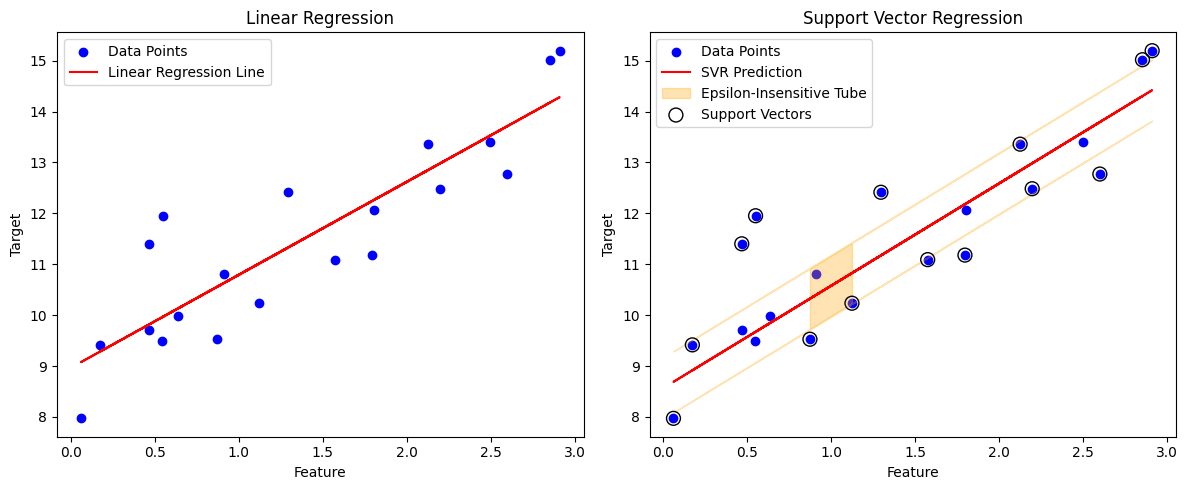

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
np.random.seed(42)
X = 3 * np.random.rand(20, 1)
y = 9 + 2 * X + np.random.randn(20, 1)

# Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lr = lin_reg.predict(X)

# Fit Support Vector Regression (SVR) with an epsilon-insensitive tube
svr = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.5))
svr.fit(X, y.ravel())
y_pred_svr = svr.predict(X)

# Plot the results for Linear Regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_lr, color='red', label='Linear Regression Line')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Plot the results for Support Vector Regression
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_svr, color='red', label='SVR Prediction')
plt.fill_between(X.ravel(), y_pred_svr - 0.6, y_pred_svr + 0.6, color='orange', alpha=0.3, label='Epsilon-Insensitive Tube')
plt.scatter(X[svr.named_steps['svr'].support_], y[svr.named_steps['svr'].support_], facecolors='none', edgecolors='black', s=100, label='Support Vectors')
plt.title('Support Vector Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()


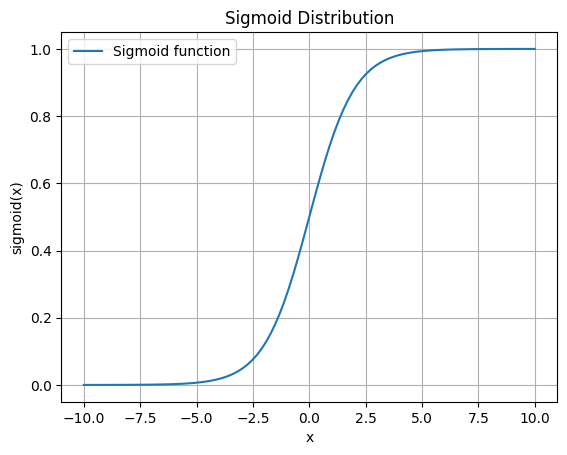

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of values for x
x = np.linspace(-10, 10, 100)

# Apply the sigmoid function to each x value
y = sigmoid(x)

# Plot the sigmoid distribution
plt.plot(x, y, label='Sigmoid function')

# Add titles and labels
plt.title('Sigmoid Distribution')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.legend()
plt.show()


**Practice**:

**Task 1**: In problem 1, train and test the SVM model with different hyperparameter settings (e.g., regularization parameter C) and analyze the impact on model performance (accuracy or F1-score).

**Task 2:** In problem 1, use all features in the dataset, and utilize *`permutation_importance`* https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html (feature importance techniques) to identify which independent variables (features) have the most significant influence on the SVM's predictions.

**Task 3:** In problem 2, try different hyperparameters for specific kernels (e.g., degree for polynomial kernel, gamma for RBF kernel). Train and compare models with different hyperparameter settings.

**Task 4:** In problem 3, try this hyperparameter: `decision_function_shape`, to compare One-vs-Rest vs. One-vs-One for this Multi-Class SVM.

**Task 5:** In problem 3, analyze the features in the dataset. Use feature selection techniques like *chi-squared test* (`SelectKBest` class) https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
to select most important features for improving model performance.

**Task 6:** In Problem 5, find a regression analysis dataset on Kaggle and follow the same process of training, tuning hyperparameters, and evaluating the model.